In [7]:
from random import randint, seed
from enum import Enum
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [12]:
seed()

def play_game(strategie):
    portes = [0,1,2]
    bonne_porte = randint(0,2)
    premier_choix = randint(0,2)
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    else:
        deuxieme_choix = premier_choix
        
    return deuxieme_choix == bonne_porte

In [14]:
play_game(Strategie.CHANGER)

True

In [16]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [18]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6621 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3376 sur 10000 parties.


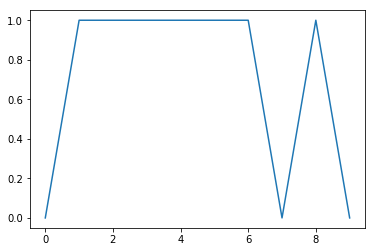

In [20]:
plot = plt.plot(play(Strategie.CHANGER,10))

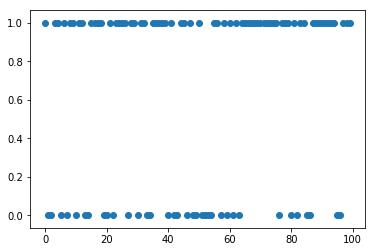

In [23]:
plot = plt.scatter(range(100), play(Strategie.CHANGER,100))

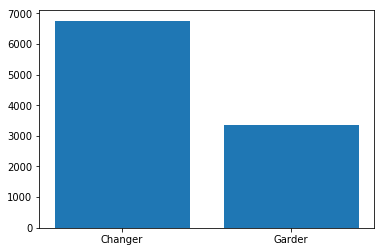

In [25]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

In [26]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

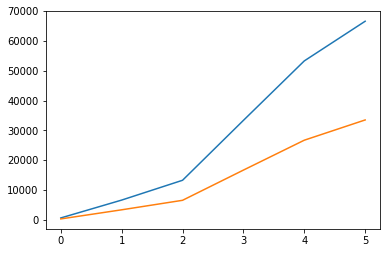

In [29]:
figure = plt.figure()
plot = plt.plot([sum(x) for x in gains_changer])
plot = plt.plot([sum(x) for x in gains_garder])